In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
festivales_bcn_14 = pd.read_pickle("./data/festivales_bcn_14_procesado.pkl")

In [129]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [130]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [131]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [132]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [133]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [134]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [135]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [136]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [137]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [138]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [139]:
festivales_bcn_14.describe().loc["mean"]

Edicio           12.571429
Asistentes    28397.020408
Name: mean, dtype: float64

In [140]:
festivales_bcn_14.describe().loc["50%"]

Edicio           12.0
Asistentes    10200.0
Name: 50%, dtype: float64

In [141]:
festivales_bcn_14.describe().loc["max"]

Edicio            46.0
Asistentes    224078.0
Name: max, dtype: float64

In [142]:
festivales_bcn_14.describe().loc["min"]

Edicio           1.0
Asistentes    1800.0
Name: min, dtype: float64

In [143]:
festivales_bcn_14[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Otoño
Entrada,De Pago


Comentarios <br>
Com una mediana de unos 10 mil asistentes, el festival tipo de Barcelona es de música y con entrada pagada, con mayorpredominancia en otoño, aunque mayor concentración en junio. Es el mismo perfil que en 2017 y 2016, aunque con algo menos de asistentes. Y es igual al año anterior (2013)

Frecuencias relativa y absoluta

In [144]:
for catego in categoricas_destacadas:
    print(festivales_bcn_14[catego].value_counts())
    print("\n")

Ambit
Música                         20
Audiovisuals                   14
Arts visuals                    4
Multidisciplinaris i altres     4
Arts escèniques                 4
Lletres                         3
Name: count, dtype: int64


Titularidad
Privada    43
Pública     5
Mixta       1
Name: count, dtype: int64


Mes
Junio         8
Julio         7
Noviembre     6
Mayo          5
Octubre       5
Septiembre    4
Marzo         4
Enero         3
Febrero       2
Abril         2
Diciembre     2
Agosto        1
Name: count, dtype: int64


Estacion
Otoño        14
Primavera    13
Verano       13
Invierno      9
Name: count, dtype: int64


Entrada
De Pago    39
Gratis      7
Mixta       3
Name: count, dtype: int64




Comentarios <br>
Junio parece ser el mes que concentra mayor cantidad de grandes festivales ya establecidos, si bien, a pesar de ello y si miramos según estaciones, es en otoño cuando mñas propuestas de este tipo hay. Cabe destacar, igualmente, que fuera de estos picos hay una distribucion equitativa enntre las otras temporadas. <br>
También es relevante observar que escénicas tiene menos representación en total, frente a las porpuestas musicales o multidisciplinares (que en ciertos casos incluyen tanto música como escénicas). <br>
Y que hay una predominancia de las poropuestas de titularidad pública, aunque seguidas muy de cerca de las privadas.

In [146]:
for catego in categoricas_destacadas:
    print(festivales_bcn_14[catego].value_counts()/len(festivales_bcn_14)*100)
    print("\n")

Ambit
Música                         40.816327
Audiovisuals                   28.571429
Arts visuals                    8.163265
Multidisciplinaris i altres     8.163265
Arts escèniques                 8.163265
Lletres                         6.122449
Name: count, dtype: float64


Titularidad
Privada    87.755102
Pública    10.204082
Mixta       2.040816
Name: count, dtype: float64


Mes
Junio         16.326531
Julio         14.285714
Noviembre     12.244898
Mayo          10.204082
Octubre       10.204082
Septiembre     8.163265
Marzo          8.163265
Enero          6.122449
Febrero        4.081633
Abril          4.081633
Diciembre      4.081633
Agosto         2.040816
Name: count, dtype: float64


Estacion
Otoño        28.571429
Primavera    26.530612
Verano       26.530612
Invierno     18.367347
Name: count, dtype: float64


Entrada
De Pago    79.591837
Gratis     14.285714
Mixta       6.122449
Name: count, dtype: float64




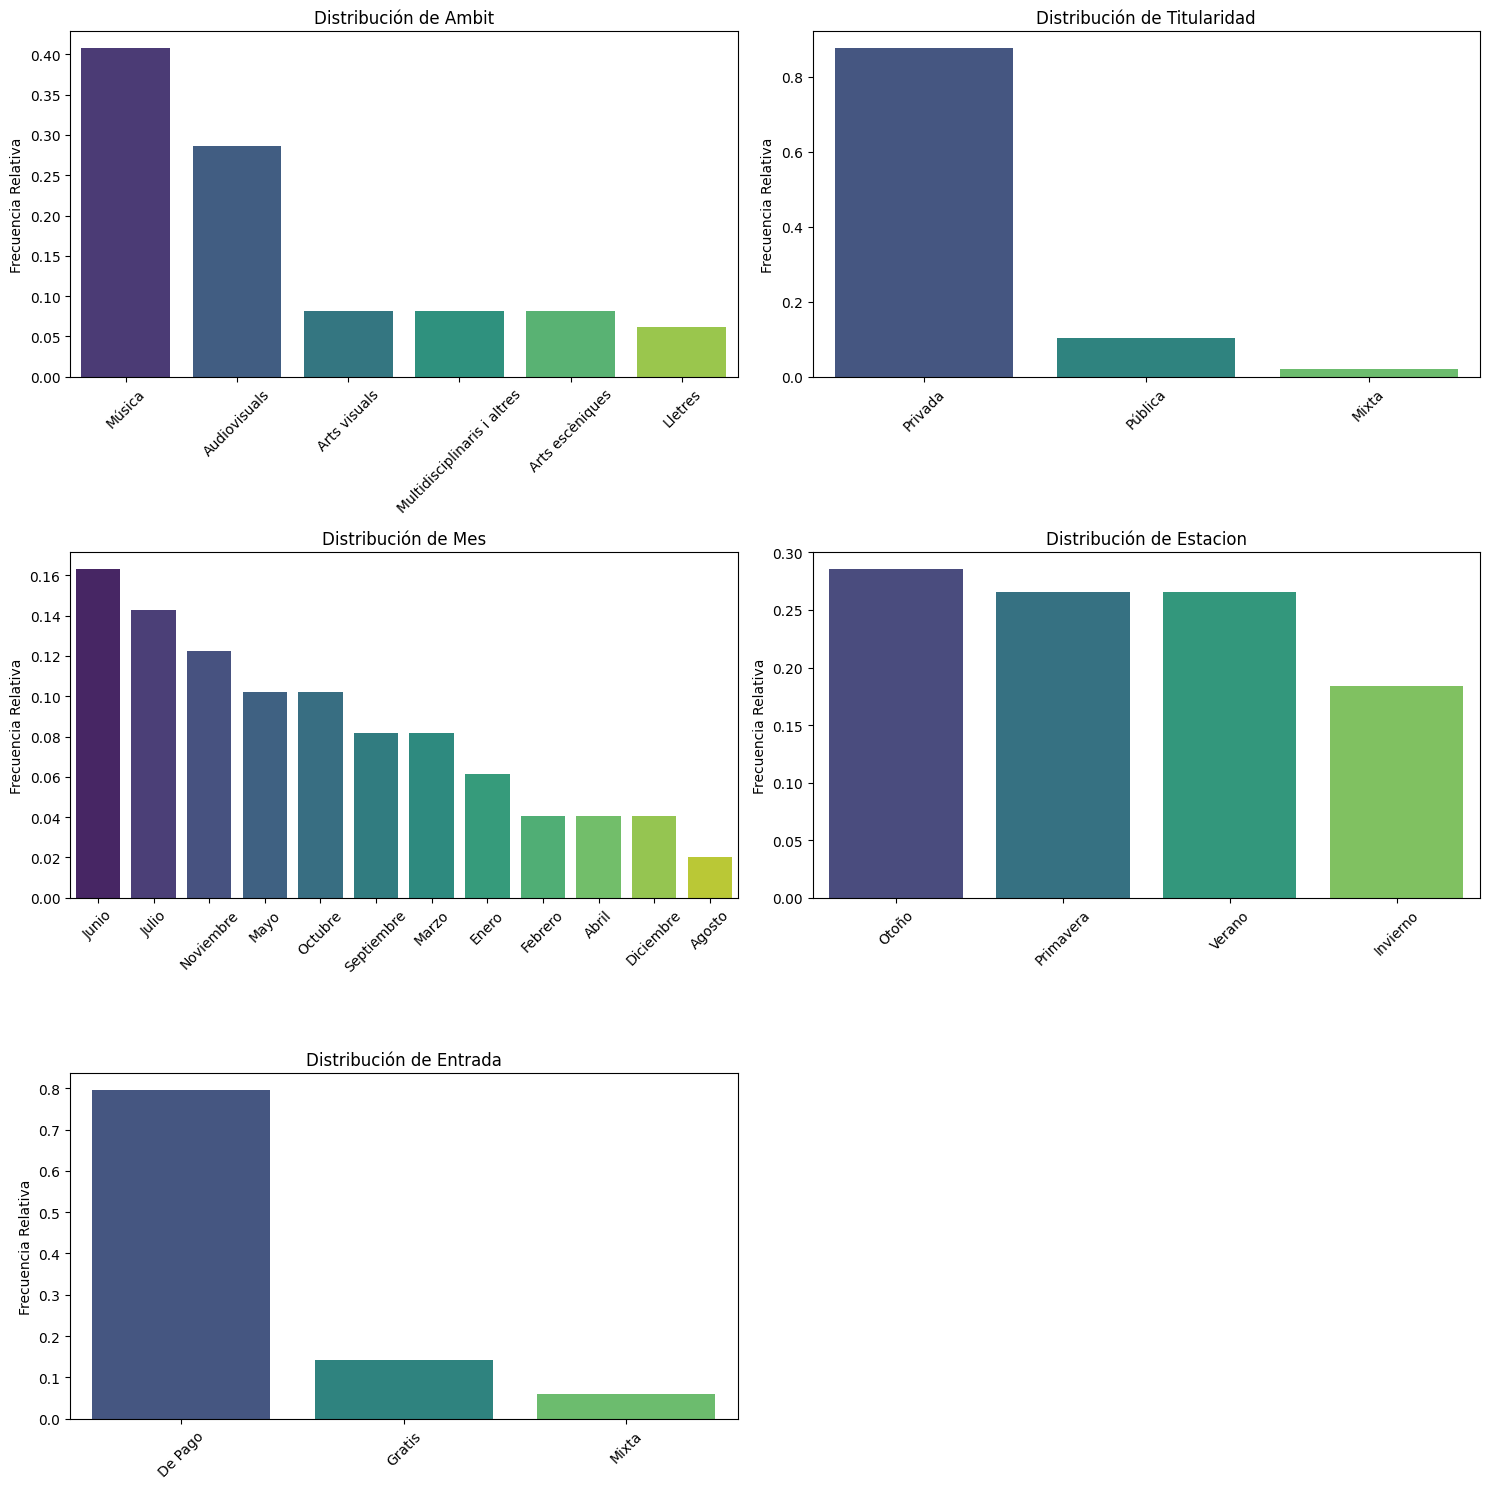

In [161]:
pinta_distribucion_categoricas(festivales_bcn_14, categoricas_destacadas, relativa= True)

Comentarios <br>
El número de propuestas del sector privado quintuplica las del sector público, y proporción de festivales gratuitos vs. de pago es cercana al cuádruple. No se vuelve a ver esta (des)proporción en los siguientes años.<br>
Hay festivales programados todos los meses, aunque con predominio muy marcado de junio. Y hay casi empate técnico entre primavera, otoño e invierno, que se acaba de igualar el año siguiente<br>
La música es sin duda la protagonista de los festivales, seguida de lejos por los audivisuales, y mucho más lejos pero en proporciones similares, tanto escénicas como visuales y multidisiplinares y hasta letras, todas a la par. <br>
Estas conclusiones parecen repetirse en la mayoría de los años, excepto en la pandemia y justo después

Medidas de posición

In [147]:
festivales_bcn_14.describe()

,Edicio,Asistentes
count,49.000000,49.000000
mean,12.571429,28397.020408
std,9.658761,45641.212300
min,1.000000,1800.000000
25%,5.000000,6155.000000
50%,12.000000,10200.000000
75%,17.000000,28000.000000
max,46.000000,224078.000000


In [148]:
get_IQR(festivales_bcn_14,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

12.0

In [149]:
print(festivales_bcn_14["Edicio"].quantile(0.5), "\n",
    festivales_bcn_14["Edicio"].quantile(0.9), "\n",
    festivales_bcn_14["Edicio"].quantile(0.95), "\n",
    festivales_bcn_14["Edicio"].max())

12.0 
 24.200000000000003 
 26.19999999999999 
 46.0


In [150]:
get_IQR(festivales_bcn_14,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

21845.0

In [151]:
print(festivales_bcn_14["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_14["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_14["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_14["Asistentes"].max())

10200.0 
 84343.80000000005 
 111187.99999999999 
 224078.0


Comentarios: <br>
Alta dispersión en el número de asistentes. La mediana está en 100 mil, unas 8 veces menos que el primer 90%, sobre los 84 mil, que da un salto hasta los 127 mil en el 95 y luego se duplica hasta alcanzar los 220 mil. Esta máxima es unas 22 veces la mediana.

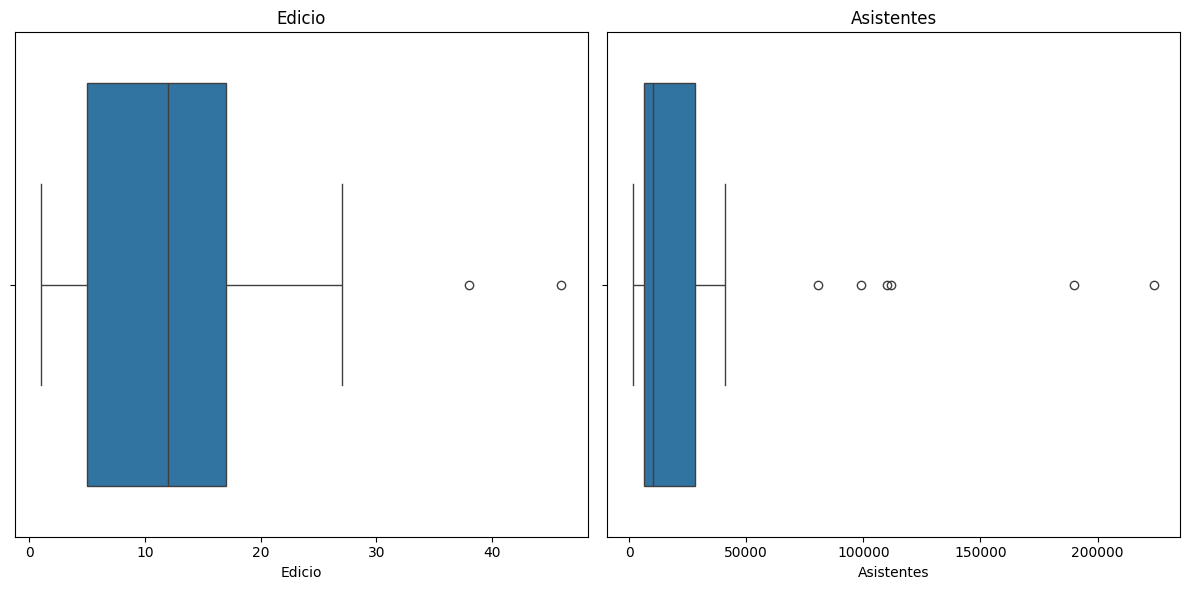

In [152]:
plot_multiple_boxplots(festivales_bcn_14, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay bastantes outliers en las cifras de asistentes.

In [153]:
plot_boxplot_grouped(festivales_bcn_14, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [154]:
festivales_bcn_14.describe().loc[["std", "mean"]].T

,std,mean
Edicio,9.658761,12.571429
Asistentes,45641.212300,28397.020408


In [155]:
variabilidad(festivales_bcn_14)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,9.658761,12.571429,0.768311
Asistentes,45641.212300,28397.020408,1.607254


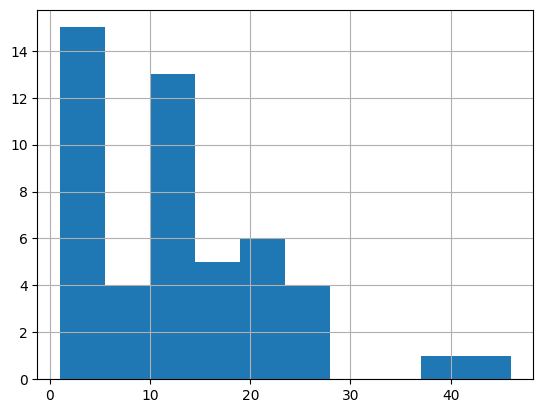

In [156]:
festivales_bcn_14["Edicio"].hist();

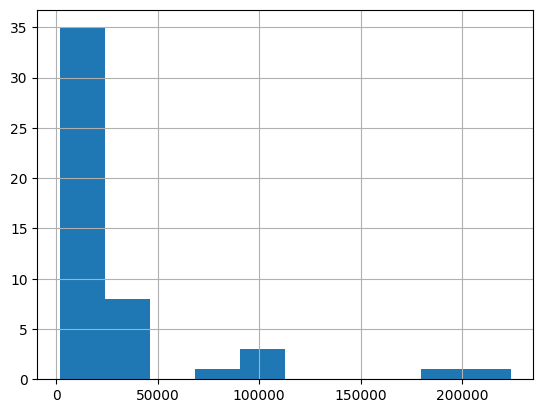

In [157]:
festivales_bcn_14["Asistentes"].hist();

Distribución

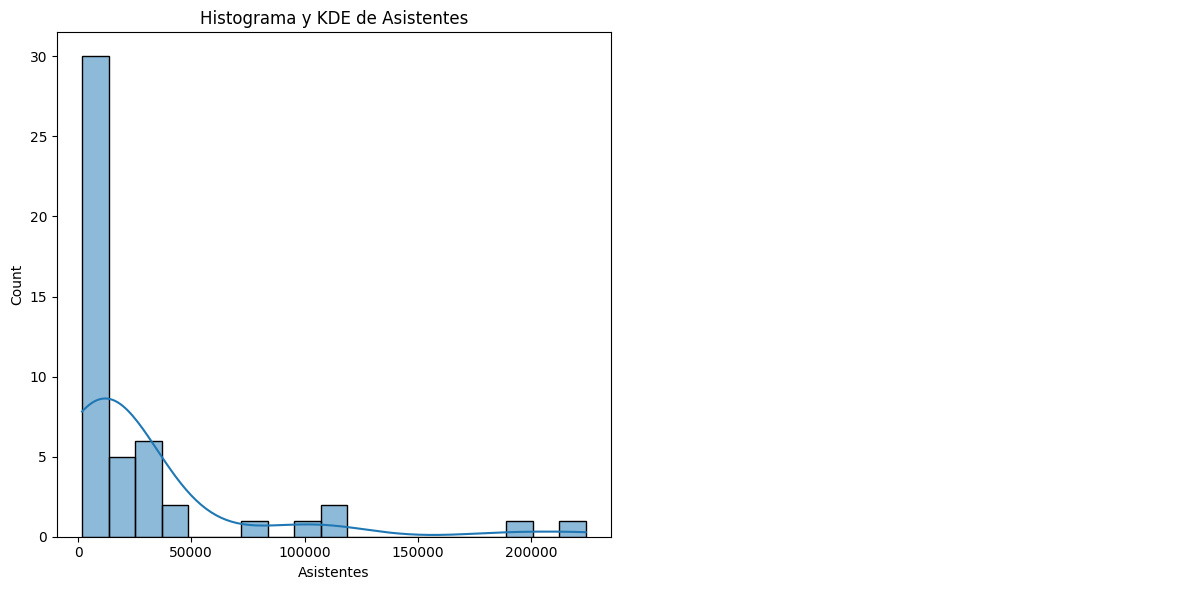

In [158]:
plot_histo_den(festivales_bcn_14, ["Asistentes"])

Anomalías outliers

(2,)


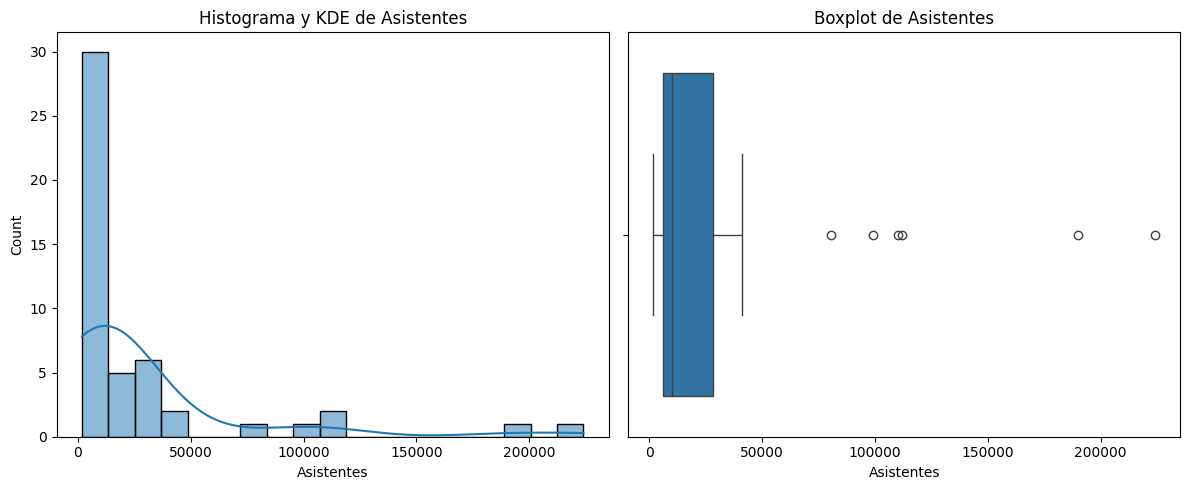

In [159]:
plot_combined_graphs(festivales_bcn_14, ["Asistentes"])

In [166]:
festivales_bcn_14 = festivales_bcn_14.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_14.head(10)  
tipo_entradas_top_festivales = primeros_10['Entrada'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")


De Pago: 6 - 60.00%
Gratis: 2 - 20.00%
Mixta: 2 - 20.00%


In [165]:
festivales_bcn_14

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
37,Arts escèniques,5.0,Mercè Arts de Carrer. MAC,Pública,Septiembre,Verano,224078.0,Gratis
43,Música,14.0,Primavera Sound,Privada,Mayo,Primavera,190000.0,De Pago
47,Música,21.0,Sónar. Festival Internacional de Música Avança...,Privada,Junio,Primavera,111980.0,De Pago
33,Arts visuals,12.0,Loop Festival,Privada,Mayo,Primavera,110000.0,De Pago
4,Música,22.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Verano,99179.0,Gratis
29,Arts escèniques,38.0,Grec Festival de Barcelona,Pública,Junio,Verano,80635.0,Mixta
16,Música,7.0,Festival Cruïlla,Privada,Julio,Verano,41000.0,De Pago
15,Multidisciplinaris i altres,4.0,FADfest. The festival of all design,Privada,Junio,Verano,39202.0,Mixta
30,Música,25.0,Guitar Bcn,Privada,Febrero,Invierno,31087.0,De Pago
34,Música,12.0,Mas i Mas Festival,Privada,Julio,Verano,31000.0,De Pago
